In [1]:
import numpy as np
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

import itertools
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import os

In [2]:
train_path = 'fruits-360/Training'
test_path = 'fruits-360/Test'
classes = ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Nectarine Flat', 'Nut Forest', 'Nut Pecan', 'Onion Red', 'Onion Red Peeled', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach 2', 'Peach Flat', 'Pear', 'Pear 2', 'Pear Abate', 'Pear Forelle', 'Pear Kaiser', 'Pear Monster', 'Pear Red', 'Pear Stone', 'Pear Williams', 'Pepino', 'Pepper Green', 'Pepper Orange', 'Pepper Red', 'Pepper Yellow', 'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum', 'Plum 2', 'Plum 3', 'Pomegranate', 'Pomelo Sweetie', 'Potato Red', 'Potato Red Washed', 'Potato Sweet', 'Potato White', 'Quince', 'Rambutan', 'Raspberry', 'Redcurrant', 'Salak', 'Strawberry', 'Strawberry Wedge', 'Tamarillo', 'Tangelo', 'Tomato 1', 'Tomato 2', 'Tomato 3', 'Tomato 4', 'Tomato Cherry Red', 'Tomato Heart', 'Tomato Maroon', 'Tomato not Ripened', 'Tomato Yellow', 'Walnut', 'Watermelon']

In [3]:
#Data augmentation and validation split
train_datagen = ImageDataGenerator(shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

batch_size=50

train_batches = train_datagen.flow_from_directory(train_path, target_size=(100,100), classes=classes, batch_size=batch_size, subset='training')
validation_batches = train_datagen.flow_from_directory(train_path, target_size=(100,100), classes=classes, batch_size=batch_size, subset='validation')
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(100,100), classes=classes, batch_size=batch_size)

Found 54190 images belonging to 131 classes.
Found 13502 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


# Build and train CNN

In [4]:
dropout_rate = 0.5

model = Sequential([
    Flatten(input_shape=(100,100,3)),#100x100x3
    Dense(131, activation='softmax'),
])

In [5]:
learning_rate=0.05
loss_function='categorical_crossentropy'
model.compile(Adam(lr=learning_rate), loss=loss_function, metrics=['accuracy'])

In [6]:
# datetime object containing current date and time
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
iter_count=0

In [7]:
if not os.path.exists("models/baseline/"):
    os.mkdir("models/baseline")
if not os.path.exists("models/baseline/"+dt_string):
    os.mkdir("models/baseline/"+dt_string)
    
summary_file = open("models/baseline/"+dt_string+"/summary.txt", "w")

def printModelSummaryToFile(line):
    summary_file.write(line+"\n")

In [8]:
model.summary(print_fn=printModelSummaryToFile)
summary_file.write("\nLearning Rate: "+str(learning_rate)+"\n")
summary_file.write("Loss Function: "+str(loss_function)+"\n")
summary_file.write("Dropout Rate: "+str(dropout_rate)+"\n")
summary_file.write("Batch Size: "+str(batch_size)+"\n")
summary_file.close()

#Callbacks
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=25)
mc = ModelCheckpoint("models/baseline/"+dt_string+"/"+dt_string+"_best.h5", monitor='val_accuracy', mode='max', save_best_only=True)

start_time = datetime.now()

history = model.fit(x=train_batches, validation_data=validation_batches, epochs=999, verbose=2, callbacks=[es, mc])

end_time = datetime.now()
time_delta =(end_time-start_time).total_seconds()

summary_file = open("models/baseline/"+dt_string+"/summary.txt", "a")
summary_file.write("Time Train Start: "+str(start_time)+"\n")
summary_file.write("Time Train End: "+str(end_time)+"\n")
summary_file.write("Time Delta: "+str(time_delta)+"\n")
summary_file.close()

model.save("models/baseline/"+dt_string+"/"+dt_string+"_last.h5")

Epoch 1/999
1084/1084 - 140s - loss: 181854.5469 - accuracy: 0.3781 - val_loss: 52176.6562 - val_accuracy: 0.5707
Epoch 2/999
1084/1084 - 135s - loss: 55434.1680 - accuracy: 0.5975 - val_loss: 76666.9609 - val_accuracy: 0.5661
Epoch 3/999
1084/1084 - 134s - loss: 51623.8164 - accuracy: 0.6740 - val_loss: 54849.3711 - val_accuracy: 0.6863
Epoch 4/999
1084/1084 - 133s - loss: 47716.4141 - accuracy: 0.7224 - val_loss: 80328.9375 - val_accuracy: 0.6798
Epoch 5/999
1084/1084 - 135s - loss: 42466.2578 - accuracy: 0.7627 - val_loss: 74390.2109 - val_accuracy: 0.7025
Epoch 6/999
1084/1084 - 134s - loss: 41487.3164 - accuracy: 0.7824 - val_loss: 88921.0391 - val_accuracy: 0.6681
Epoch 7/999
1084/1084 - 134s - loss: 38718.5312 - accuracy: 0.8039 - val_loss: 73126.8047 - val_accuracy: 0.7251
Epoch 8/999
1084/1084 - 133s - loss: 32397.0723 - accuracy: 0.8316 - val_loss: 72387.3750 - val_accuracy: 0.7430
Epoch 9/999
1084/1084 - 134s - loss: 32482.0430 - accuracy: 0.8380 - val_loss: 85069.5859 - val

Epoch 73/999
1084/1084 - 127s - loss: 9539.2646 - accuracy: 0.9693 - val_loss: 137228.0469 - val_accuracy: 0.8475
Epoch 74/999
1084/1084 - 128s - loss: 10540.4375 - accuracy: 0.9681 - val_loss: 115755.9531 - val_accuracy: 0.8646
Epoch 75/999
1084/1084 - 128s - loss: 8912.7188 - accuracy: 0.9722 - val_loss: 112960.7266 - val_accuracy: 0.8475
Epoch 76/999
1084/1084 - 128s - loss: 9435.0762 - accuracy: 0.9701 - val_loss: 114298.3594 - val_accuracy: 0.8723
Epoch 77/999
1084/1084 - 135s - loss: 9722.9268 - accuracy: 0.9692 - val_loss: 119234.3359 - val_accuracy: 0.8631
Epoch 78/999
1084/1084 - 134s - loss: 9220.0254 - accuracy: 0.9716 - val_loss: 122965.7969 - val_accuracy: 0.8724
Epoch 79/999
1084/1084 - 134s - loss: 9749.5332 - accuracy: 0.9695 - val_loss: 114770.0938 - val_accuracy: 0.8780
Epoch 80/999
1084/1084 - 135s - loss: 8788.9062 - accuracy: 0.9726 - val_loss: 123550.7734 - val_accuracy: 0.8703
Epoch 81/999
1084/1084 - 134s - loss: 9421.2070 - accuracy: 0.9706 - val_loss: 128710.9

# Prediction

In [9]:
best_model = load_model("models/baseline/"+dt_string+"/"+dt_string+"_best.h5")

In [10]:
test_imgs, test_labels = next(test_batches)

In [11]:
test_labels = np.argmax(test_labels, axis=-1)
test_labels

array([130, 101,  21, 128,   7,  30,  44, 120,  45,  82,  81,  79,  68,
        50, 110,  84,  89,  44,  64,  16, 118,  10,  58,  98, 115, 117,
        74,  23,  76,  42, 127,  59,  85,  80,  89,  34, 129,  59,  43,
        17, 125, 122,  26,  18, 123, 122,  51,   9,  73, 130], dtype=int64)

In [12]:
predictions = np.argmax(best_model.predict(x=test_imgs, steps=1, verbose=0), axis=-1)

In [13]:
predictions

array([130, 101,  16, 128,   7,  30,  44, 120,  45,  84,  81,  79,  68,
        50, 110,  84,  89,  44,  64,  17, 118,  10,  58,  98, 115, 117,
        74,  23,  76,  42, 127,  59,  21, 105,  89,  34, 129,  59,  43,
        17, 125, 122,  26,  18, 123, 122,  51,  37,  73, 130], dtype=int64)

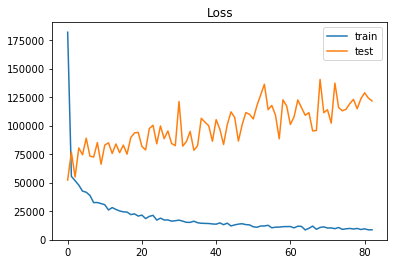

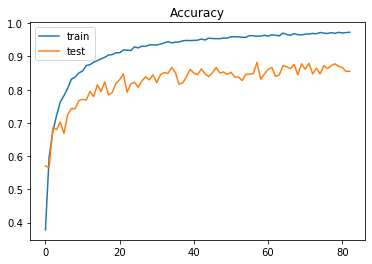

In [14]:
# plot training history
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig("models/baseline/"+dt_string+"/loss_history.png", bbox_inches='tight')
plt.show()

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.savefig("models/baseline/"+dt_string+"/accuracy_history.png", bbox_inches='tight')
plt.show()

In [15]:
# evaluate the model
_, train_acc = best_model.evaluate(train_batches, verbose=1)
_, test_acc = best_model.evaluate(test_batches, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
summary_file = open("models/baseline/"+dt_string+"/summary.txt", "a")
summary_file.write("Train Accuracy: "+str(train_acc)+"\n")
summary_file.write("Test Accuracy: "+str(test_acc)+"\n")
summary_file.close()

454/454 [==============================] - 18s 41ms/step - loss: 88932.2266 - accuracy: 0.8811
Train: 0.971, Test: 0.881


In [16]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 131)               3930131   
Total params: 3,930,131
Trainable params: 3,930,131
Non-trainable params: 0
_________________________________________________________________
